In [50]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [51]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [52]:
NUM_CLASSES = 6

# Dataset reading

In [53]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [54]:
X_dataset

array([[ 0.        ,  0.        , -0.18456376, ..., -0.68791944,
         0.23154363, -0.7919463 ],
       [ 0.        ,  0.        , -0.1780822 , ..., -0.6815069 ,
         0.2260274 , -0.7773973 ],
       [ 0.        ,  0.        , -0.18275861, ..., -0.6793103 ,
         0.22758621, -0.7758621 ],
       ...,
       [ 0.        ,  0.        ,  0.03355705, ...,  0.03355705,
        -0.05369128,  0.06040268],
       [ 0.        ,  0.        ,  0.03401361, ...,  0.04081633,
        -0.07482993,  0.06802721],
       [ 0.        ,  0.        ,  0.02721088, ...,  0.04081633,
        -0.08163265,  0.07482993]], dtype=float32)

In [55]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [56]:
y_dataset

array([0, 0, 0, ..., 2, 2, 2])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [59]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [61]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [62]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
35/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1778 - loss: 1.8341
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1898 - loss: 1.8201 - val_accuracy: 0.3375 - val_loss: 1.6723
Epoch 2/1000
41/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2707 - loss: 1.6888
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2733 - loss: 1.6837 - val_accuracy: 0.4254 - val_loss: 1.5593
Epoch 3/1000
26/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3131 - loss: 1.5992 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3183 - loss: 1.5887 - val_accuracy: 0.4697 - val_loss: 1.4556
Epoch 4/1000
42/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3709 - loss: 1.5130
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
4

In [63]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9896 - loss: 0.1506


In [64]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [65]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[9.7252584e-01 2.3090610e-02 5.1517795e-06 3.5951242e-09 4.5512452e-06
 4.3739164e-03]
0


# Confusion matrix

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


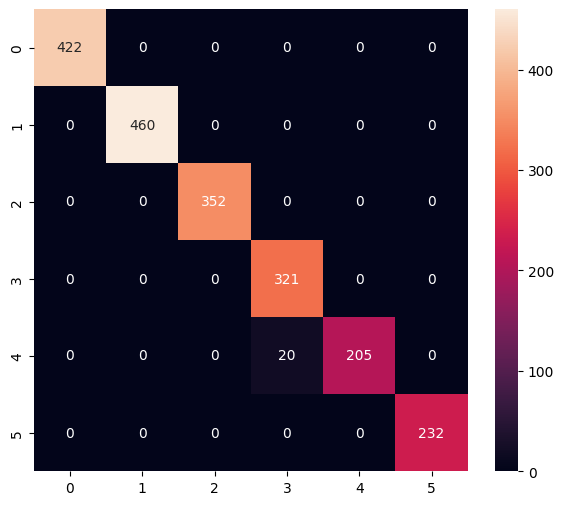

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       1.00      1.00      1.00       460
           2       1.00      1.00      1.00       352
           3       0.94      1.00      0.97       321
           4       1.00      0.91      0.95       225
           5       1.00      1.00      1.00       232

    accuracy                           0.99      2012
   macro avg       0.99      0.99      0.99      2012
weighted avg       0.99      0.99      0.99      2012



In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [67]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [68]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\mashr\AppData\Local\Temp\tmp2fzgbdu9\assets


INFO:tensorflow:Assets written to: C:\Users\mashr\AppData\Local\Temp\tmp2fzgbdu9\assets


Saved artifact at 'C:\Users\mashr\AppData\Local\Temp\tmp2fzgbdu9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  2399542275984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2399542277136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2399542275216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2399542274448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2399542275792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2399542275600: TensorSpec(shape=(), dtype=tf.resource, name=None)


6628

# Inference test

In [69]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [70]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [71]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [72]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [73]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.7252584e-01 2.3090661e-02 5.1517895e-06 3.5951240e-09 4.5512447e-06
 4.3739285e-03]
0
